In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

issue_d
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

Think about the objective of the model - what data can we use in reality

Such as the delay of the plane - we don't know the arrival time.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

# from sklearn.metrics import (
#     accuracy_score, confusion_matrix, classification_report, 
#     roc_auc_score, roc_curve, auc,
#     plot_confusion_matrix, plot_roc_curve
# )
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc
)

# import tensorflow as tf
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

<Axes: xlabel='loan_amnt', ylabel='Count'>

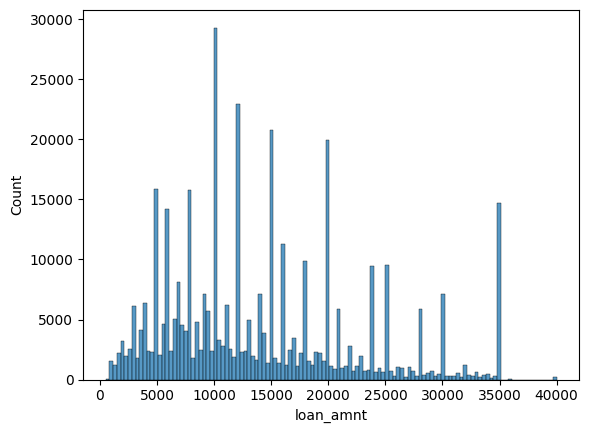

In [6]:
sns.histplot(data['loan_amnt'])

In [7]:
data['loan_amnt'].isna().sum()

0

In [8]:
data['term'].apply(lambda x:int(x[:-7])).value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

In [9]:
data['term'].apply(lambda x:str(x)[-6:]).value_counts()

term
months    396030
Name: count, dtype: int64

<Axes: xlabel='int_rate', ylabel='Count'>

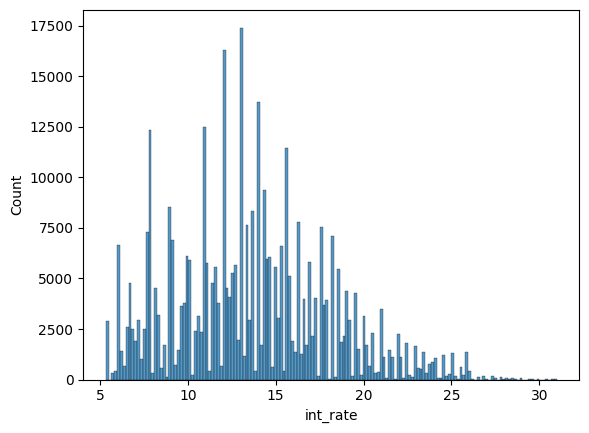

In [10]:
sns.histplot(data['int_rate'])

In [11]:
data['int_rate'].describe()

count   396030.00
mean        13.64
std          4.47
min          5.32
25%         10.49
50%         13.33
75%         16.49
max         30.99
Name: int_rate, dtype: float64

In [12]:
data['int_rate'].sort_values()

367250    5.32
144268    5.32
131040    5.32
391627    5.32
190682    5.32
          ... 
181517   30.99
341696   30.99
355273   30.99
313210   30.99
332498   30.99
Name: int_rate, Length: 396030, dtype: float64

In [13]:
data['annual_inc'].describe()

count    396030.00
mean      74203.18
std       61637.62
min           0.00
25%       45000.00
50%       64000.00
75%       90000.00
max     8706582.00
Name: annual_inc, dtype: float64

In [14]:
data['annual_inc'].sort_values()

285674         0.00
350865       600.00
7011        2500.00
72405       4000.00
127390      4000.00
            ...    
100946   7000000.00
376306   7141778.00
100370   7446395.00
318255   7600000.00
308700   8706582.00
Name: annual_inc, Length: 396030, dtype: float64

<Axes: >

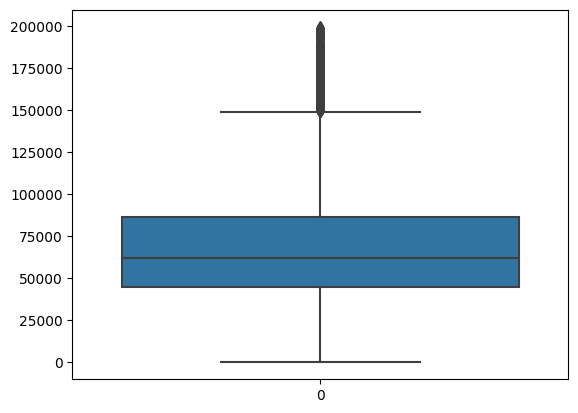

In [15]:
sns.boxplot(data['annual_inc'][data['annual_inc']<200000])

In [16]:
data['installment'].describe()

count   396030.00
mean       431.85
std        250.73
min         16.08
25%        250.33
50%        375.43
75%        567.30
max       1533.81
Name: installment, dtype: float64

<Axes: xlabel='installment', ylabel='Count'>

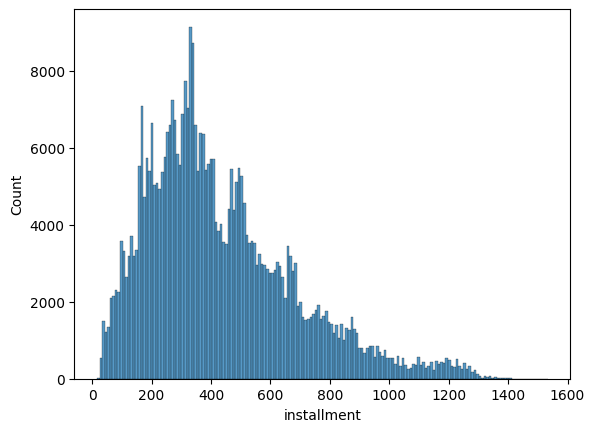

In [17]:
sns.histplot(data['installment'])

<Axes: xlabel='grade', ylabel='Count'>

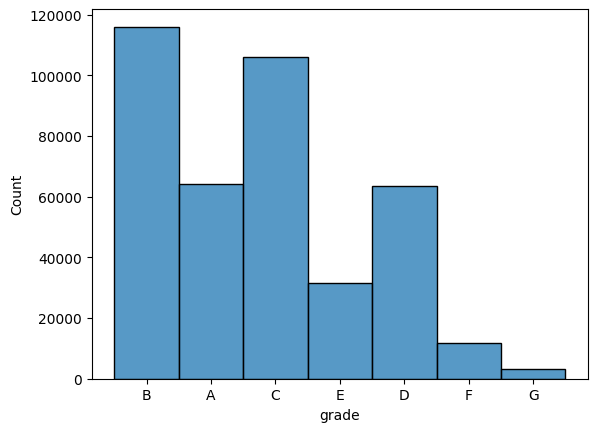

In [18]:
sns.histplot(data['grade'])

In [19]:
data['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [20]:
data['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [21]:
data['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [22]:
data['emp_length'].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [23]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [24]:
data['home_ownership'].isna().sum()

0

In [25]:
data['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [26]:
data['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [27]:
data['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [28]:
data['dti'].describe()

count   396030.00
mean        17.38
std         18.02
min          0.00
25%         11.28
50%         16.91
75%         22.98
max       9999.00
Name: dti, dtype: float64

In [29]:
data['dti'].sort_values(ascending = False)

##first outlier - 9999,1622 maybe an outlier

285674   9999.00
350865   1622.00
338571    380.53
7011      189.90
36015     145.65
           ...  
252369      0.00
246141      0.00
12720       0.00
197619      0.00
40251       0.00
Name: dti, Length: 396030, dtype: float64

<Axes: xlabel='dti', ylabel='Count'>

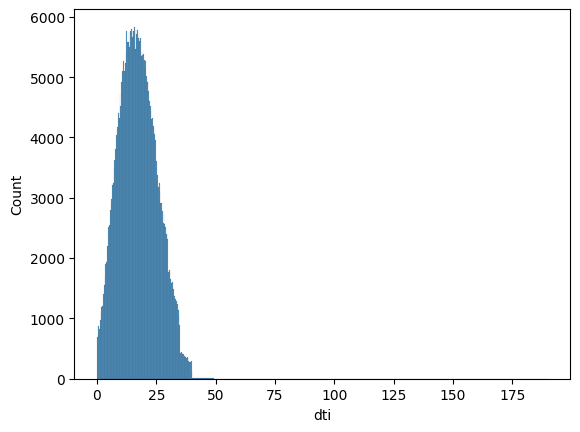

In [30]:
sns.histplot(data['dti'][data['dti']<200])

<Axes: >

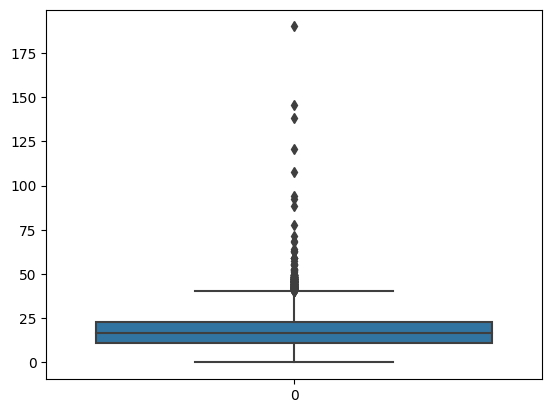

In [31]:
sns.boxplot(data['dti'][data['dti']<200])

(array([5.00000e+00, 3.20000e+01, 2.52000e+02, 1.48700e+03, 5.74700e+03,
        1.76670e+04, 4.81660e+04, 1.27590e+05, 1.64363e+05, 3.07210e+04]),
 array([-9497. , -6949.4, -4401.8, -1854.2,   693.4,  3241. ,  5788.6,
         8336.2, 10883.8, 13431.4, 15979. ]),
 <BarContainer object of 10 artists>)

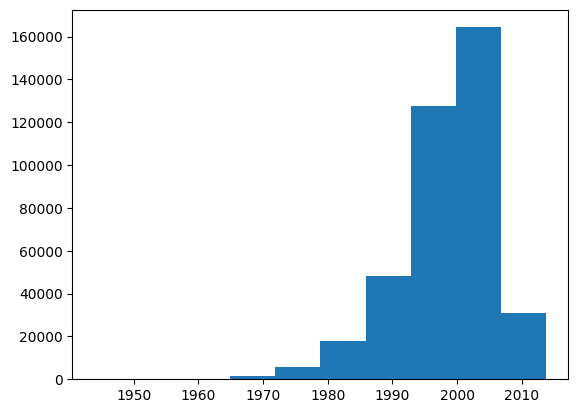

In [32]:
plt.hist(pd.to_datetime(data['earliest_cr_line']))

In [33]:
pd.to_datetime(data['earliest_cr_line']).sort_values().iloc[:10]

## 1944?maybe an outlier

57842    1944-01-01
351793   1948-01-01
208495   1950-10-01
102200   1950-11-01
174317   1950-12-01
266961   1951-07-01
212992   1951-08-01
67520    1951-12-01
23622    1953-01-01
131997   1953-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [34]:
data['open_acc'].value_counts().sort_index().iloc[:20]

open_acc
0.00         6
1.00        85
2.00      1459
3.00      4783
4.00     10709
5.00     18308
6.00     25927
7.00     31328
8.00     35137
9.00     36779
10.00    35441
11.00    32695
12.00    29157
13.00    24983
14.00    21173
15.00    17347
16.00    14376
17.00    11618
18.00     9430
19.00     7723
Name: count, dtype: int64

In [35]:
data['pub_rec'].value_counts()

pub_rec
0.00     338272
1.00      49739
2.00       5476
3.00       1521
4.00        527
5.00        237
6.00        122
7.00         56
8.00         34
9.00         12
10.00        11
11.00         8
13.00         4
12.00         4
19.00         2
40.00         1
17.00         1
86.00         1
24.00         1
15.00         1
Name: count, dtype: int64

<Axes: xlabel='revol_bal', ylabel='Count'>

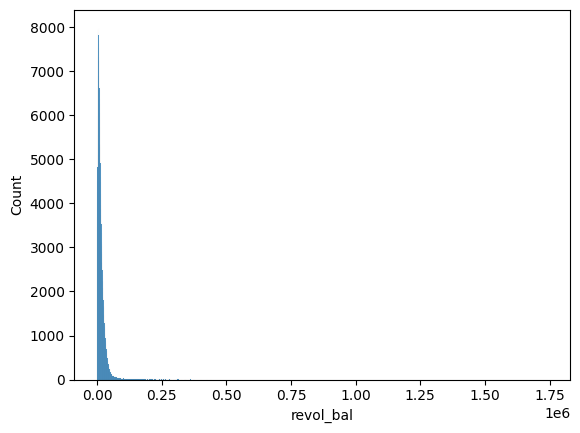

In [36]:
sns.histplot(data['revol_bal'])

In [37]:
data['revol_bal'].describe()

count    396030.00
mean      15844.54
std       20591.84
min           0.00
25%        6025.00
50%       11181.00
75%       19620.00
max     1743266.00
Name: revol_bal, dtype: float64

In [38]:
data['revol_bal'].sort_values().iloc[-20:]

367755    654134.00
151343    658548.00
318342    661711.00
141152    664894.00
379095    669257.00
385370    669560.00
103864    690987.00
241384    693471.00
212218    694615.00
181198    744190.00
395097    778614.00
134154    814300.00
316129    838698.00
238979    867528.00
308857    975800.00
255310   1023940.00
119450   1030826.00
53563    1190046.00
244156   1298783.00
118582   1743266.00
Name: revol_bal, dtype: float64

<Axes: xlabel='revol_util', ylabel='Count'>

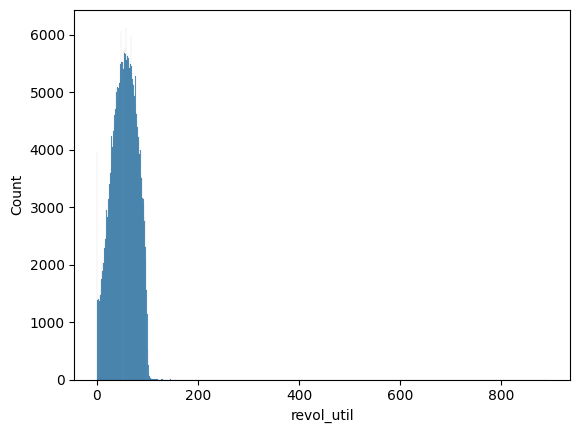

In [39]:
sns.histplot(data['revol_util'])

In [40]:
data['revol_util'].describe()

count   395754.00
mean        53.79
std         24.45
min          0.00
25%         35.80
50%         54.80
75%         72.90
max        892.30
Name: revol_util, dtype: float64

In [41]:
data['revol_util'].sort_values(ascending=False)

137211   892.30
329037   153.00
82600    152.50
65687    150.70
350333   148.00
          ...  
385222      NaN
388426      NaN
390665      NaN
395088      NaN
395665      NaN
Name: revol_util, Length: 396030, dtype: float64

In [42]:
data['revol_util'].isna().sum()

## Second Outlier: NA and 892.3

276

In [43]:
data['total_acc'].describe()

count   396030.00
mean        25.41
std         11.89
min          2.00
25%         17.00
50%         24.00
75%         32.00
max        151.00
Name: total_acc, dtype: float64

<Axes: xlabel='total_acc', ylabel='Count'>

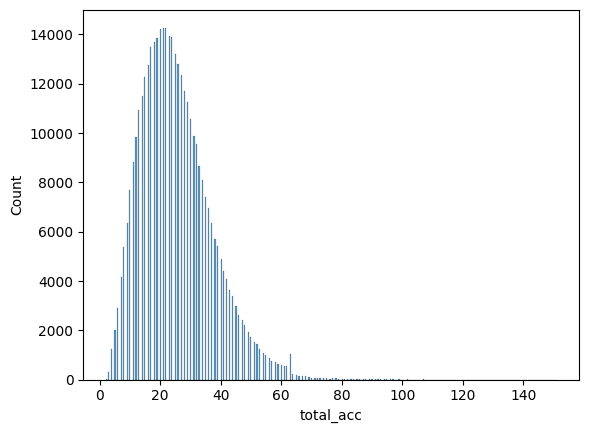

In [44]:
sns.histplot(data['total_acc'])

In [45]:
data['initial_list_status'].value_counts()

initial_list_status
f    238066
w    157964
Name: count, dtype: int64

In [46]:
data['application_type'].value_counts()

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [47]:
data['mort_acc'].value_counts()

mort_acc
0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: count, dtype: int64

In [48]:
data['mort_acc'].isna().sum()

## many NA 

37795

<Axes: >

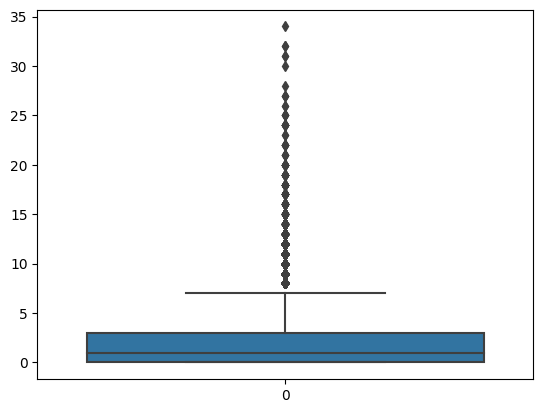

In [49]:
sns.boxplot(data['mort_acc'])

In [50]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.00    350380
1.00     42790
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: count, dtype: int64

In [51]:
data['loan_status'].value_counts().hvplot.bar(
    title="Loan Status Counts", xlabel='Loan Status', ylabel='Count', 
    width=500, height=350)

:Bars   [loan_status]   (count)

<Axes: xlabel='loan_status', ylabel='count'>

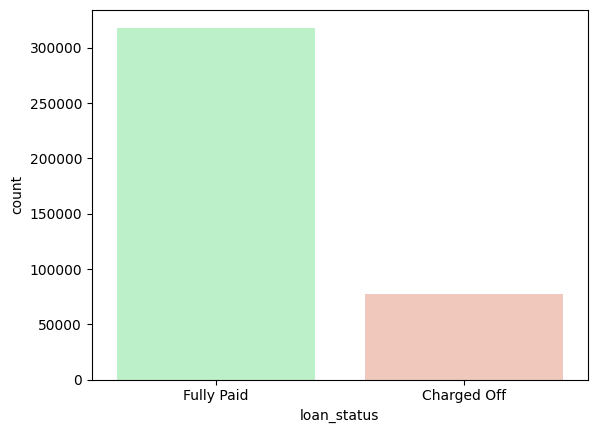

In [52]:
colors = ['#B3F9C5', '#f9c5b3']
sns.countplot(x = 'loan_status', data=data, palette=colors)

<Axes: >

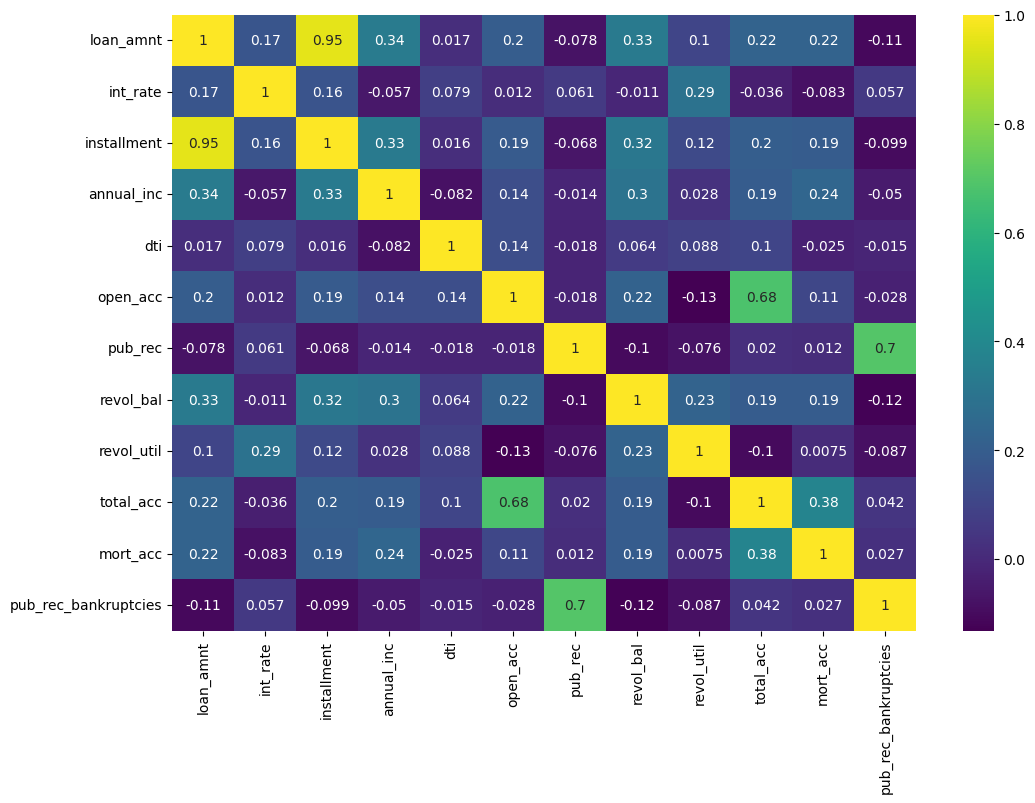

In [53]:
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(),  annot=True,cmap='viridis')

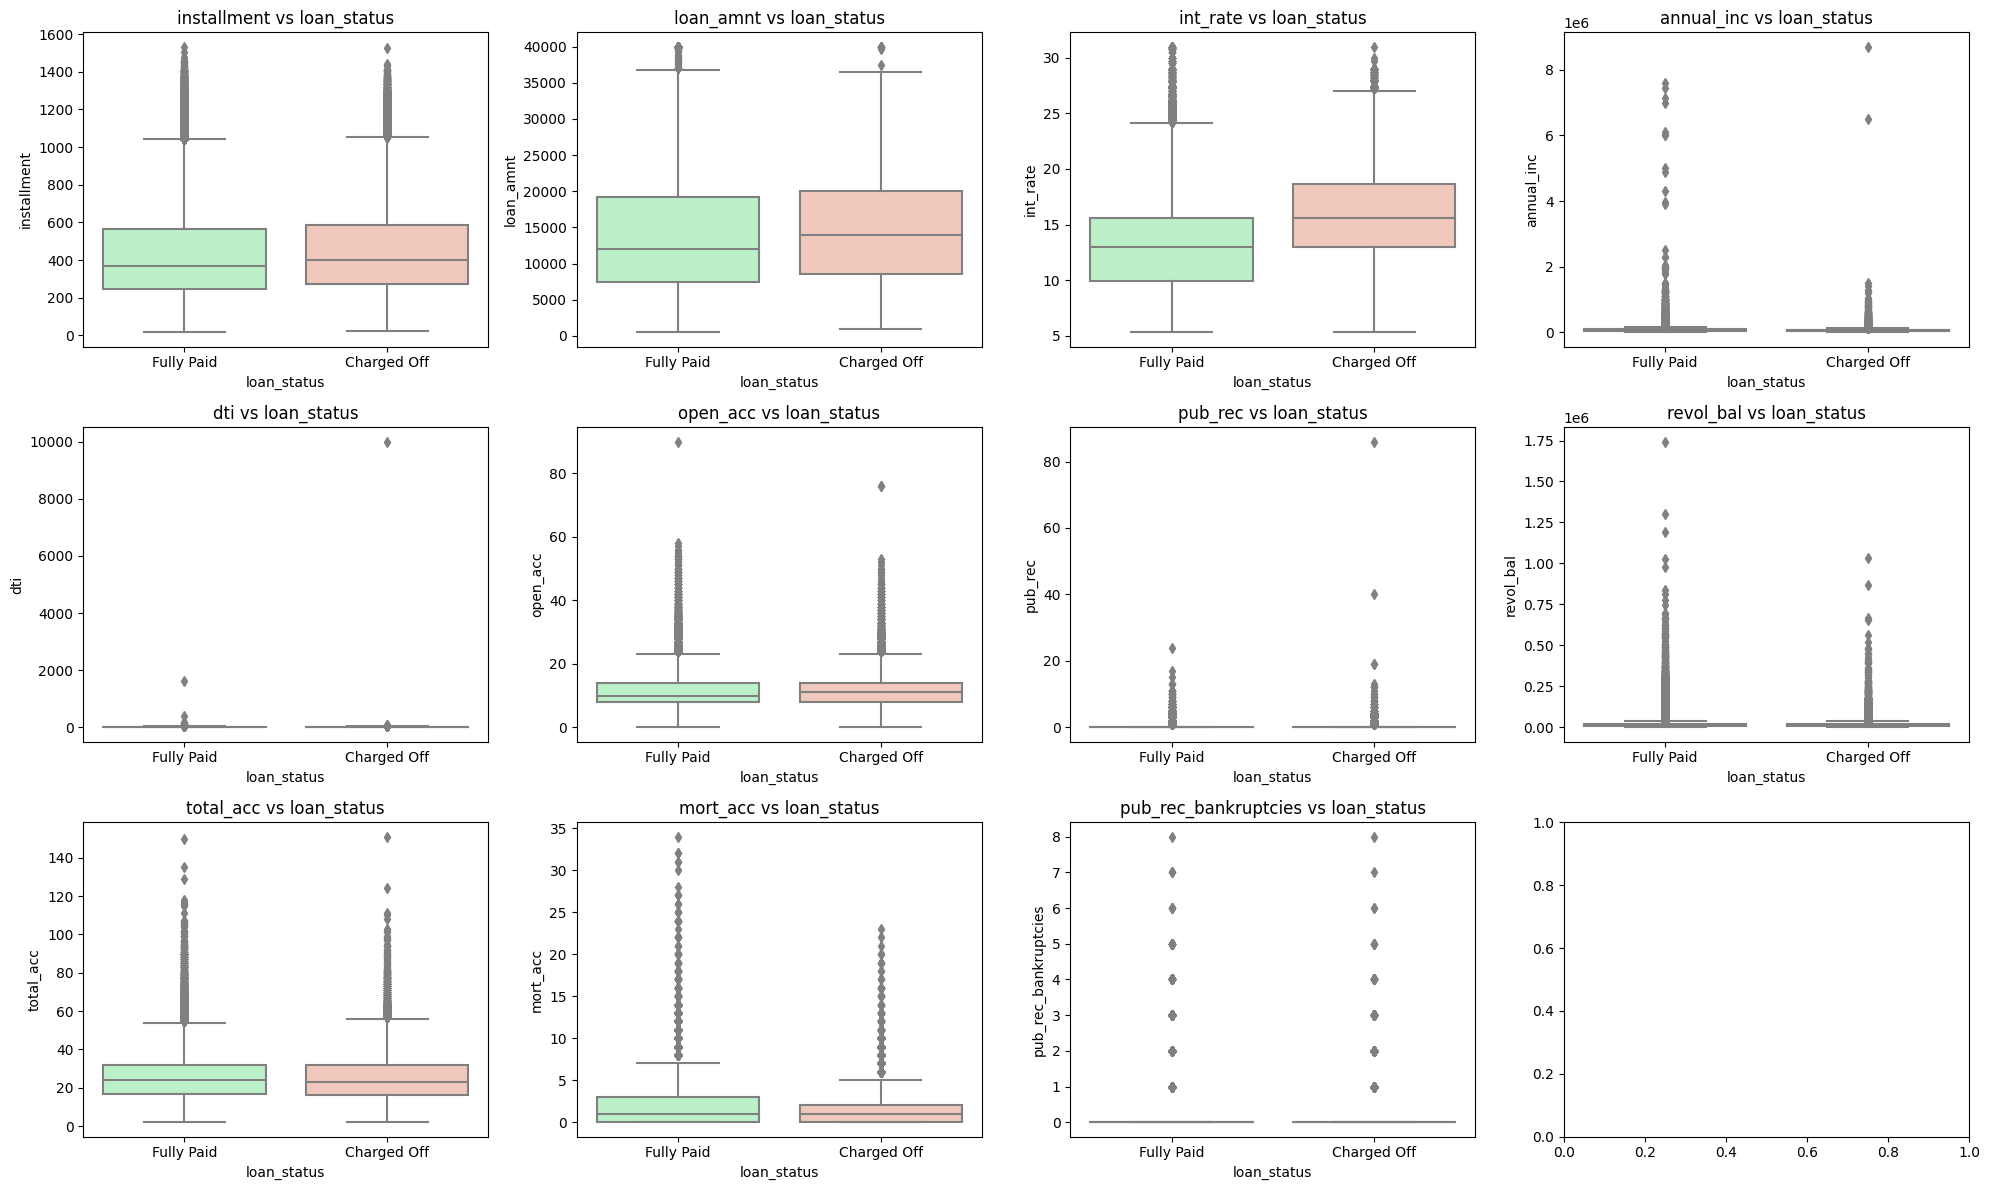

In [54]:
f, axes = plt.subplots(nrows = 3, ncols=4, figsize=(20,12))

axess = axes.flatten()

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="loan_status", y="installment", data=data, palette=colors, ax=axess[0])
axess[0].set_title('installment vs loan_status')

sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette=colors, ax=axess[1])
axess[1].set_title('loan_amnt vs loan_status')

sns.boxplot(x="loan_status", y="int_rate", data=data, palette=colors, ax=axess[2])
axess[2].set_title('int_rate vs loan_status')


sns.boxplot(x="loan_status", y="annual_inc", data=data, palette=colors, ax=axess[3])
axess[3].set_title('annual_inc vs loan_status')

sns.boxplot(x="loan_status", y="dti", data=data, palette=colors, ax=axess[4])
axess[4].set_title('dti vs loan_status')

sns.boxplot(x="loan_status", y="open_acc", data=data, palette=colors, ax=axess[5])
axess[5].set_title('open_acc vs loan_status')

sns.boxplot(x="loan_status", y="pub_rec", data=data, palette=colors, ax=axess[6])
axess[6].set_title('pub_rec vs loan_status')

sns.boxplot(x="loan_status", y="revol_bal", data=data, palette=colors, ax=axess[7])
axess[7].set_title('revol_bal vs loan_status')

sns.boxplot(x="loan_status", y="total_acc", data=data, palette=colors, ax=axess[8])
axess[8].set_title('total_acc vs loan_status')

sns.boxplot(x="loan_status", y="mort_acc", data=data, palette=colors, ax=axess[9])
axess[9].set_title('mort_acc vs loan_status')

sns.boxplot(x="loan_status", y="pub_rec_bankruptcies", data=data, palette=colors, ax=axess[10])
axess[10].set_title('pub_rec_bankruptcies vs loan_status')

plt.tight_layout()
plt.show()


In [55]:
installment = data.hvplot.hist(
    y='installment', by='loan_status', subplots=False, 
    width=350, height=400, bins=50, alpha=0.4, 
    title="Installment by Loan Status", 
    xlabel='Installment', ylabel='Counts', legend='top'
)

loan_amnt = data.hvplot.hist(
    y='loan_amnt', by='loan_status', subplots=False, 
    width=350, height=400, bins=30, alpha=0.4, 
    title="Loan Amount by Loan Status", 
    xlabel='Loan Amount', ylabel='Counts', legend='top'
)

installment + loan_amnt

:Layout
   .NdOverlay.I  :NdOverlay   [loan_status]
      :Histogram   [installment]   (installment_count)
   .NdOverlay.II :NdOverlay   [loan_status]
      :Histogram   [loan_amnt]   (loan_amnt_count)

In [56]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,15126.30,8505.09,1000.00,8525.00,14000.00,20000.00,40000.00
Fully Paid,318357.00,13866.88,8302.32,500.00,7500.00,12000.00,19225.00,40000.00


In [57]:
data.groupby(by='loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.00,452.70,249.10,21.62,274.86,399.06,585.67,1527.00
Fully Paid,318357.00,426.76,250.86,16.08,244.46,369.51,562.89,1533.81


In [58]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts().sort_index().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts().sort_index().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [grade]   (count)
   .Bars.Count.II :Bars   [grade]   (count)

In [59]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts().sort_index().hvplot.bar() 
charged_off = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts().sort_index().hvplot.bar() 

(fully_paid * charged_off).opts(
    title="Loan Status by Grade", xlabel='Grades', ylabel='Count',
    width=500, height=400, legend_cols=2, legend_position='top_right', xrotation=90
)

:Overlay
   .Bars.Count.I  :Bars   [sub_grade]   (count)
   .Bars.Count.II :Bars   [sub_grade]   (count)

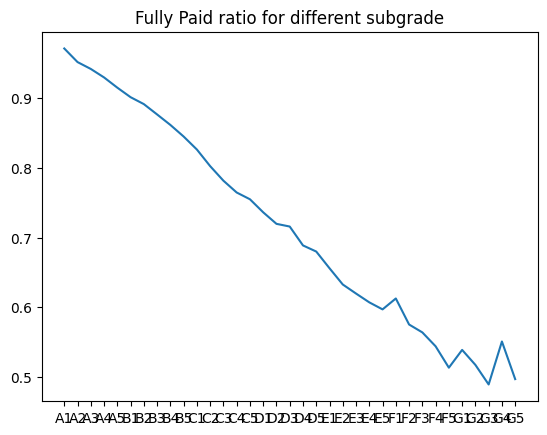

In [60]:
plt.plot(data.groupby("sub_grade").apply(lambda x:x['loan_status'].value_counts()['Fully Paid']/len(x)))
plt.title("Fully Paid ratio for different subgrade")
plt.show()

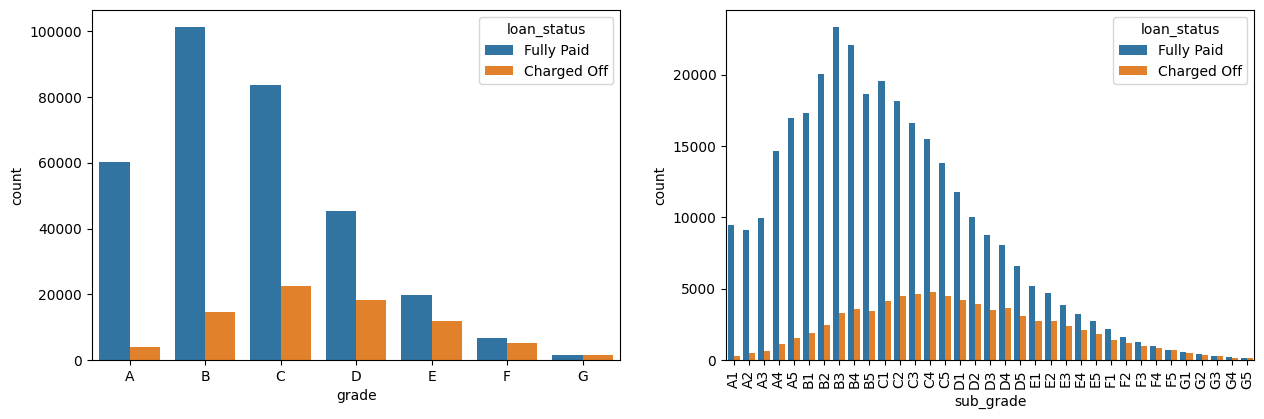

In [61]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

<Axes: xlabel='home_ownership', ylabel='count'>

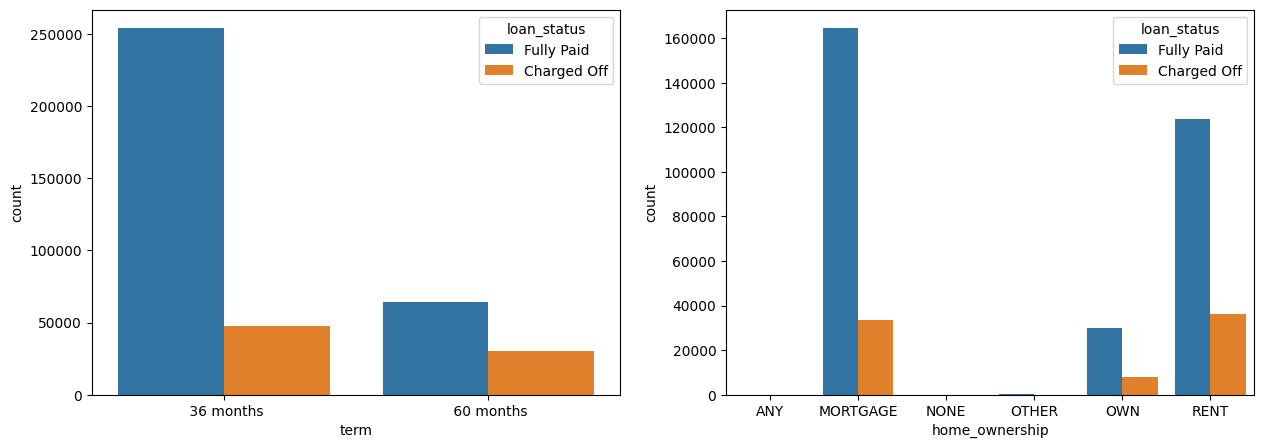

In [62]:
f, axes = plt.subplots(nrows = 1, ncols=2, figsize=(15,5))

axess = axes.flatten()


term = sorted(data.term.unique().tolist())
sns.countplot(x = "term",data=data,hue = 'loan_status',order = term,ax = axess[0])

home_ownership = sorted(data.home_ownership.unique().tolist())
sns.countplot(x = "home_ownership",data=data,hue = 'loan_status',order = home_ownership,ax = axess[1])

In [63]:
data.loc[(data['home_ownership'] == "NONE") | (data['home_ownership'] == "ANY"),'home_ownership'] = "OTHER"

In [64]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

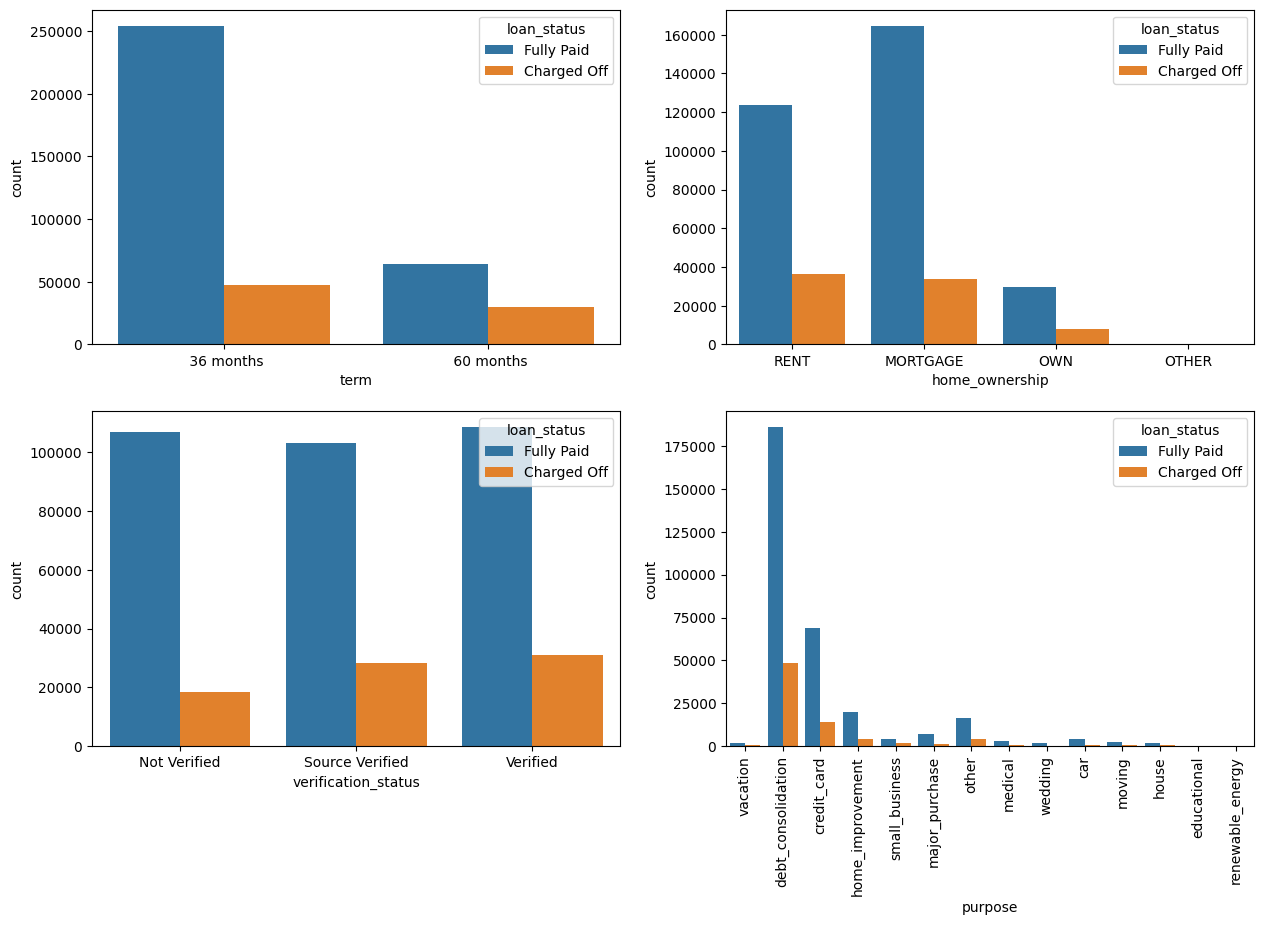

In [65]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

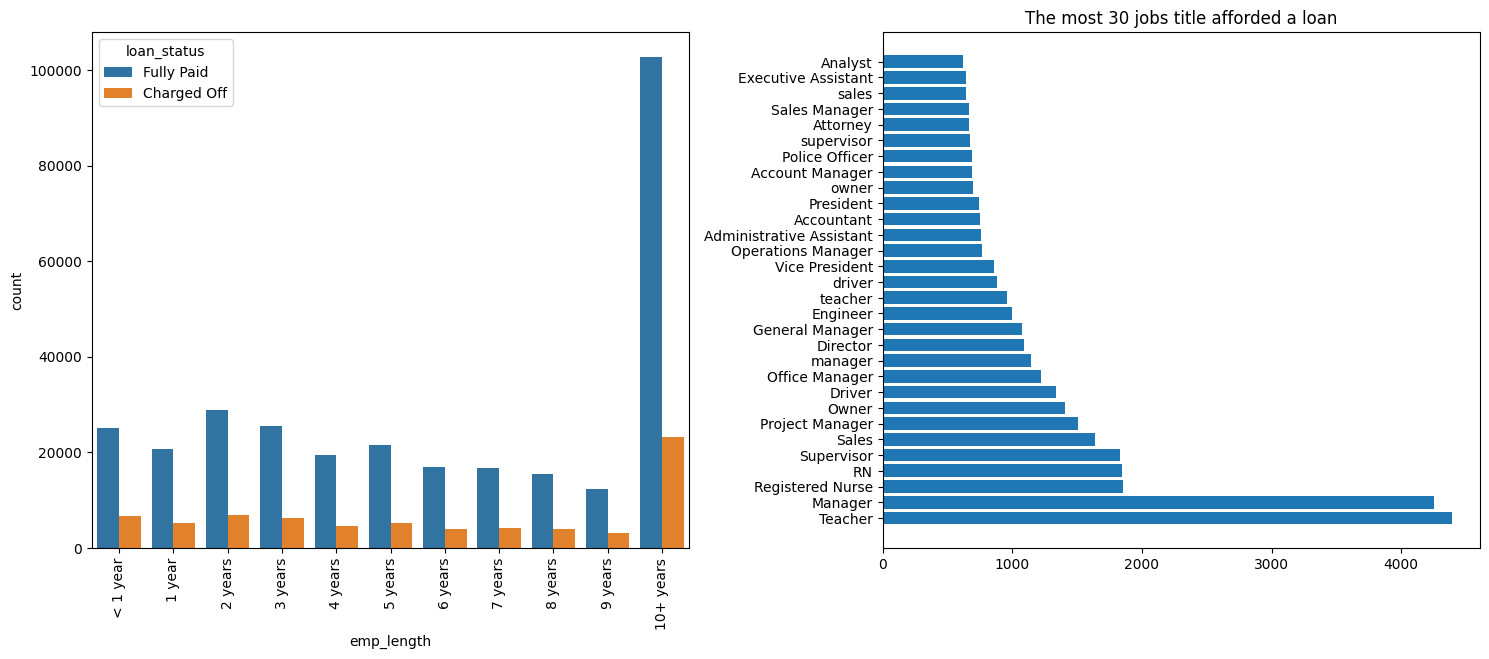

In [66]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

In [67]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

In [68]:
data['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

In [69]:
fully_paid = data.loc[data['loan_status']=='Fully Paid', 'issue_d'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'issue_d'].hvplot.hist(bins=35)

# fully_paid * charged_off
loan_issue_date = (fully_paid * charged_off).opts(
    title="Loan Status by Loan Issue Date", xlabel='Loan Issue Date', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

fully_paid = data.loc[data['loan_status']=='Fully Paid', 'earliest_cr_line'].hvplot.hist(bins=35) 
charged_off = data.loc[data['loan_status']=='Charged Off', 'earliest_cr_line'].hvplot.hist(bins=35)

earliest_cr_line = (fully_paid * charged_off).opts(
    title="Loan Status by earliest_cr_line", xlabel='earliest_cr_line', ylabel='Count',
    width=350, height=350, legend_cols=2, legend_position='top_right'
).opts(xrotation=45)

loan_issue_date + earliest_cr_line

:Layout
   .Overlay.I  :Overlay
      .Histogram.I  :Histogram   [issue_d]   (issue_d_count)
      .Histogram.II :Histogram   [issue_d]   (issue_d_count)
   .Overlay.II :Overlay
      .Histogram.I  :Histogram   [earliest_cr_line]   (earliest_cr_line_count)
      .Histogram.II :Histogram   [earliest_cr_line]   (earliest_cr_line_count)

In [70]:
data.title.value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [71]:
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [72]:
data['emp_title'].nunique()

173105

In [73]:
data.drop('emp_title', axis=1, inplace=True)

In [74]:
data['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

[Text(0, 0, '10+ years'),
 Text(1, 0, '9 years'),
 Text(2, 0, '8 years'),
 Text(3, 0, '7 years'),
 Text(4, 0, '6 years'),
 Text(5, 0, '5 years'),
 Text(6, 0, '4 years'),
 Text(7, 0, '3 years'),
 Text(8, 0, '2 years'),
 Text(9, 0, '1 year'),
 Text(10, 0, '< 1 year')]

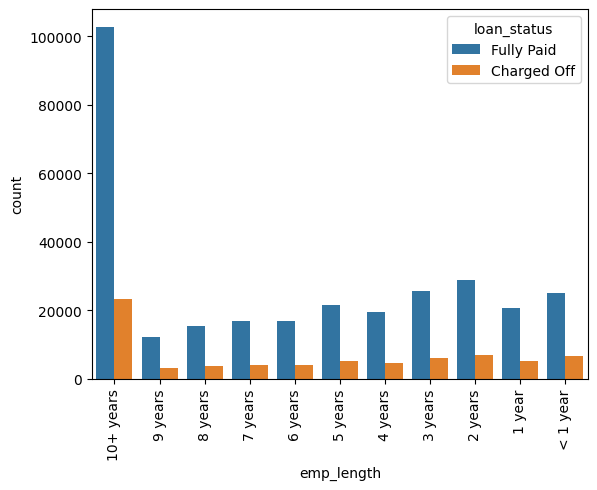

In [75]:
g = sns.countplot(x = 'emp_length',hue = 'loan_status',data = data,order = ['10+ years', '9 years' , '8 years', '7 years', '6 years','5 years', '4 years',
       '3 years', '2 years', '1 year','< 1 year'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)

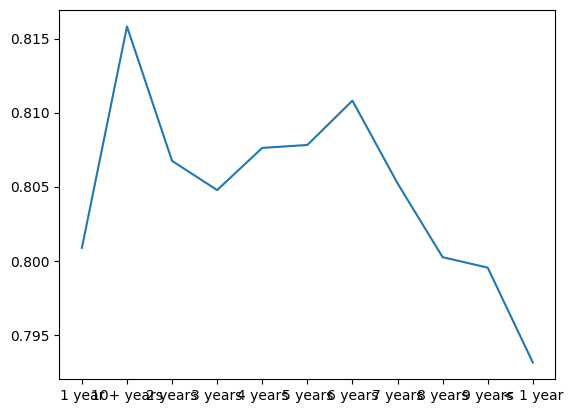

In [76]:
plt.plot(data.groupby('emp_length').apply(lambda x:x['loan_status'].value_counts()['Fully Paid']/len(x)))

In [77]:
data['emp_length'].isna().sum()

18301

In [78]:
data.drop('emp_length', axis=1, inplace=True)

In [79]:
data['title'].nunique()

48816

In [80]:
data.drop('title', axis=1, inplace=True)

In [81]:
data = data[data['revol_util']<200]

<Axes: xlabel='loan_status', ylabel='revol_util'>

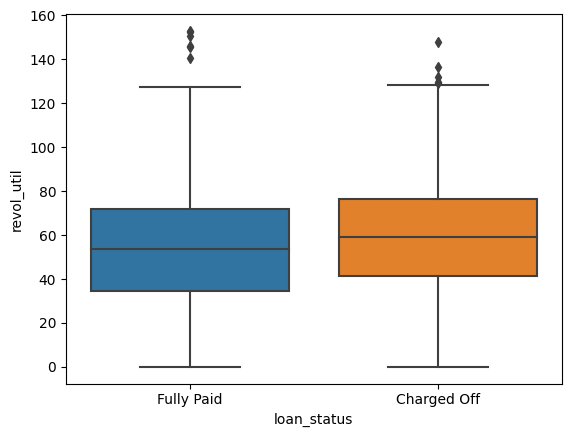

In [82]:
sns.boxplot(x = "loan_status", y = 'revol_util' ,data = data)

In [83]:
data['revol_util'].isna().sum()

0

In [84]:
data.mort_acc.value_counts()

mort_acc
0.00     139707
1.00      60384
2.00      49907
3.00      38022
4.00      27865
5.00      18182
6.00      11059
7.00       6050
8.00       3120
9.00       1653
10.00       863
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: count, dtype: int64

In [85]:
data.mort_acc.isna().sum()

37740

In [86]:
avg_mortacc = data.groupby(by='total_acc').apply(lambda x:x['mort_acc'].mean())

In [87]:
avg_mortacc[5]

0.10210803689064558

In [88]:
data[['total_acc','mort_acc']].corr()

,total_acc,mort_acc
total_acc,1.00,0.38
mort_acc,0.38,1.00


In [89]:
def fill_mort_acc(mort_acc,total_acc):
    if np.isnan(mort_acc):
        return avg_mortacc[total_acc]
    else:
        return mort_acc

In [90]:
data[['total_acc','mort_acc']].apply(lambda x:fill_mort_acc(x[1],x[0]),axis=1)

0        0.00
1        3.00
2        0.00
3        0.00
4        1.00
         ... 
396025   0.00
396026   1.00
396027   0.00
396028   5.00
396029   1.36
Length: 395753, dtype: float64

In [91]:
data['mort_acc'] = data[['total_acc','mort_acc']].apply(lambda x:fill_mort_acc(x[1],x[0]),axis=1)

In [92]:
data['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.00    350107
1.00     42786
2.00      1847
3.00       351
4.00        82
5.00        32
6.00         7
7.00         4
8.00         2
Name: count, dtype: int64

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

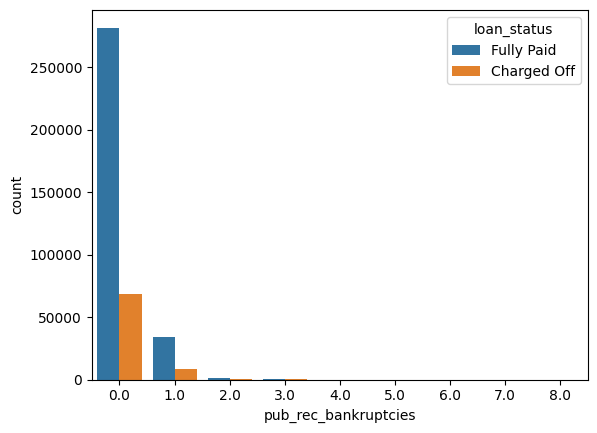

In [93]:
sns.countplot(x = 'pub_rec_bankruptcies',hue = 'loan_status',data = data)

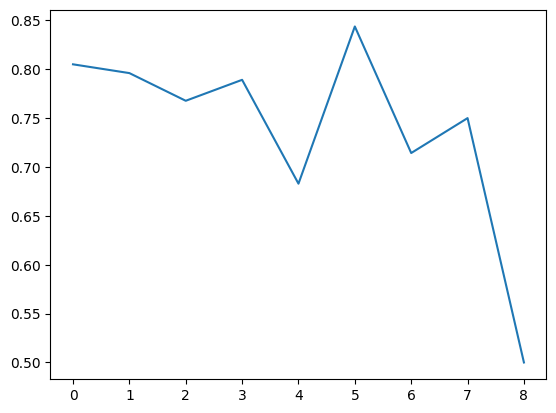

In [94]:
plt.plot(data.groupby('pub_rec_bankruptcies').apply(lambda x:x['loan_status'].value_counts()[0]/len(x)).sort_index())

In [95]:
data.dropna(inplace = True)

In [96]:
data.shape

(395218, 24)

In [97]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'initial_list_status', 'application_type', 'address']


In [98]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [99]:
data['term'] = data['term'].apply(lambda x:int(x[1:3]))

In [100]:
data['term'].unique()

array([36, 60])

In [101]:
data.drop('grade', axis=1, inplace=True)

In [102]:
data['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [103]:
data['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [104]:
data['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [105]:
data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [106]:
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [107]:
data['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [108]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [109]:
data['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395218, dtype: object

In [110]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

<Axes: xlabel='zip_code', ylabel='count'>

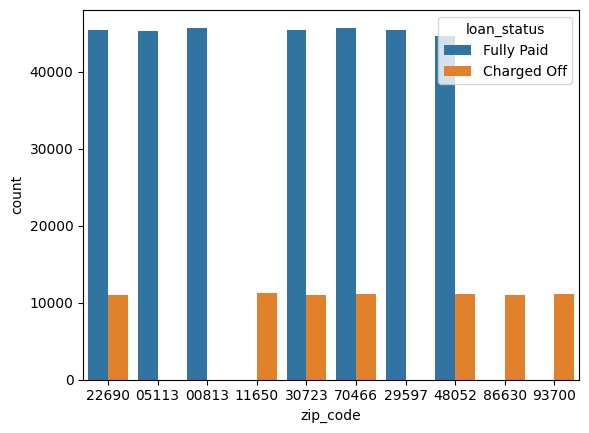

In [111]:
sns.countplot(x = 'zip_code', hue = 'loan_status',data= data)

In [112]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [113]:
data.drop('address', axis=1, inplace=True)


In [114]:
data.shape

(395218, 80)

In [115]:
data['issue_d']

0        2015-01-01
1        2015-01-01
2        2015-01-01
3        2014-11-01
4        2013-04-01
            ...    
396025   2015-10-01
396026   2015-02-01
396027   2013-10-01
396028   2012-08-01
396029   2010-06-01
Name: issue_d, Length: 395218, dtype: datetime64[ns]

In [116]:
data['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 395218, dtype: datetime64[ns]

In [117]:
data['earliest_cr_line'] = data.earliest_cr_line.dt.year

In [118]:
data['earliest_cr_line'].unique()

array([1990, 2004, 2007, 2006, 1999, 2005, 1994, 1997, 1984, 1995, 2001,
       1982, 1996, 2000, 2003, 2008, 1998, 2002, 2009, 1992, 1988, 2010,
       1986, 2012, 1978, 1993, 1983, 1989, 1991, 2011, 1980, 1981, 1987,
       1985, 1967, 1972, 1969, 1979, 1965, 1977, 1974, 1976, 1975, 1971,
       2013, 1964, 1970, 1973, 1963, 1960, 1966, 1961, 1968, 1958, 1955,
       1953, 1959, 1962, 1944, 1956, 1951, 1957, 1950, 1954, 1948],
      dtype=int32)

In [119]:
data.shape

(395218, 80)

In [120]:
data['loan_status'] = data.loan_status.map({'Fully Paid':1, 'Charged Off':0})
data.drop('issue_d',axis=1,inplace = True)

In [121]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.33,random_state=None)

In [122]:
for train_index, test_index in sss.split(data.drop('loan_status',axis= 1),data['loan_status']):
    train = data.iloc[train_index]
    test = data.iloc[test_index]

In [123]:
train.shape

(264796, 79)

In [124]:
test.shape

(130422, 79)

<Axes: >

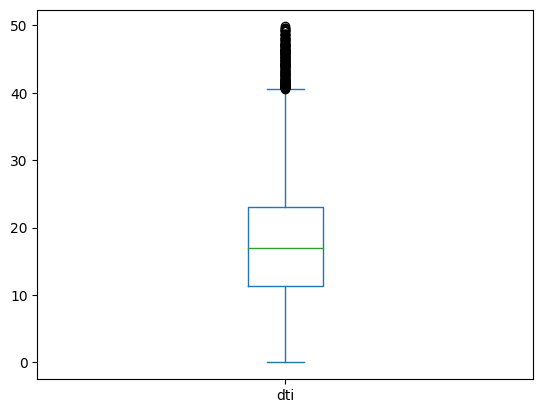

In [132]:
train['dti'][train['dti']<50].plot(kind = 'box')

In [133]:
train['dti'].sort_values(ascending = False)

285674   9999.00
350865   1622.00
338571    380.53
7011      189.90
36015     145.65
           ...  
74470       0.00
283150      0.00
307301      0.00
74637       0.00
297639      0.00
Name: dti, Length: 264796, dtype: float64

In [134]:
train = train[train['dti']<= 50]

<Axes: >

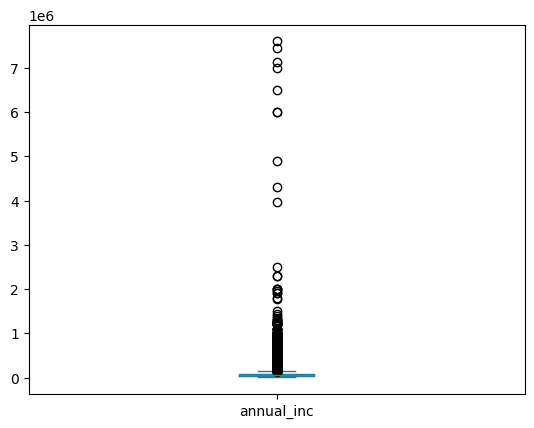

In [136]:
train['annual_inc'].plot(kind = 'box')

In [137]:
train['annual_inc'].describe()

count    264770.00
mean      74190.31
std       62652.13
min        4000.00
25%       45000.00
50%       64000.00
75%       90000.00
max     7600000.00
Name: annual_inc, dtype: float64

In [138]:
[x for x in train.columns if train[x].dtype == float]

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

In [139]:
def drop_outliers(train, column):
    q25 = np.quantile(train[column],0.25)
    q75 = np.quantile(train[column],0.75)
    iqr = q75 - q25
    lower = max(q25 - iqr*2,0)
    upper = q75 + iqr*2
    print(upper)
    return train[(train[column]<=upper)&(train[column]>=lower)]

In [140]:
print(train.shape)
train = drop_outliers(train,'annual_inc')
train = drop_outliers(train,'open_acc')
train = drop_outliers(train,'total_acc')
train = drop_outliers(train,'revol_util')
train = drop_outliers(train,'revol_bal')
print(train.shape)

(264770, 79)
180000.0
26.0
62.0
146.8
45164.5
(245542, 79)


In [141]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [142]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [144]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [145]:
y_train

array([1., 1., 0., ..., 1., 0., 1.], dtype=float32)

In [146]:
xgb_clf = XGBClassifier(use_label_encoder=False)


In [147]:
param_grid = dict(
    n_estimators=stats.randint(10, 50),
    max_depth=stats.randint(2, 8),
    learning_rate=stats.uniform(0, 1)
)

xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=60, 
    scoring='roc_auc', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, y_train)

best_params = xgb_cv.best_params_
best_params['tree_method'] = 'gpu_hist'

Fitting 3 folds for each of 60 candidates, totalling 180 fits


In [148]:
best_params

{'learning_rate': 0.3392374024094367,
 'max_depth': 6,
 'n_estimators': 44,
 'tree_method': 'gpu_hist'}

In [ ]:
import pandas as pd
import urllib
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization
import time
from urllib.request import urlretrieve

def xgb_cv(max_depth, learning_rate, subsample, colsample_bytree):
    params = {'objective': 'binary:logistic',
              'max_depth': int(max_depth),
              'learning_rate': learning_rate,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree}
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, early_stopping_rounds=10, nfold=5, metrics='error')
    return -cv_result['test-error-mean'].iloc[-1]

pbounds = {'max_depth': (3, 9),
           'learning_rate': (0.01, 0.5),
           'subsample': (0.1, 1),
           'colsample_bytree': (0.1, 1)}

print('Performing hyperparameter tuning using Bayesian optimization...')
optimizer = BayesianOptimization(f=xgb_cv, pbounds=pbounds, random_state=1)
optimizer.maximize(init_points=5, n_iter=40)

print('Training the XGBoost model with the best hyperparameters from Bayesian optimization...')

params = {'objective': 'binary:logistic',
          'max_depth': int(optimizer.max['params']['max_depth']),
          'learning_rate': optimizer.max['params']['learning_rate'],
          'subsample': optimizer.max['params']['subsample'],
          'colsample_bytree':optimizer.max['params']['colsample_bytree']}
          
print('Making predictions on the test set...')
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)
y_pred = [int(round(value)) for value in y_pred]

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f%%' % (accuracy * 100.0))

In [175]:
params

{'objective': 'binary:logistic',
 'max_depth': 3,
 'learning_rate': 0.5,
 'subsample': 0.8102799490217539,
 'colsample_bytree': 0.7388139392998837}

In [176]:
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7388139392998837, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [177]:
import xgboost as xgb

# Set class weights
class_weights = {0: 10, 1: 1}  # Class 0: 1, Class 1: 10

# Set "scale_pos_weight" based on class balance
pos_weight = sum(class_weights.values()) / sum(class_weights.keys())

# Train XGBoost model
model = xgb.XGBClassifier(scale_pos_weight=pos_weight,**params)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7388139392998837, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [178]:
y_pred = xgb_model.predict(X_test)
y_pred = [int(round(value)) for value in y_pred]

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred,pos_label = 0)
print('Accuracy: %.2f%%' % (accuracy * 100.0))
print('Recall:%.2f%%' % (recall * 100.0))

Accuracy: 88.91%
Recall:47.22%


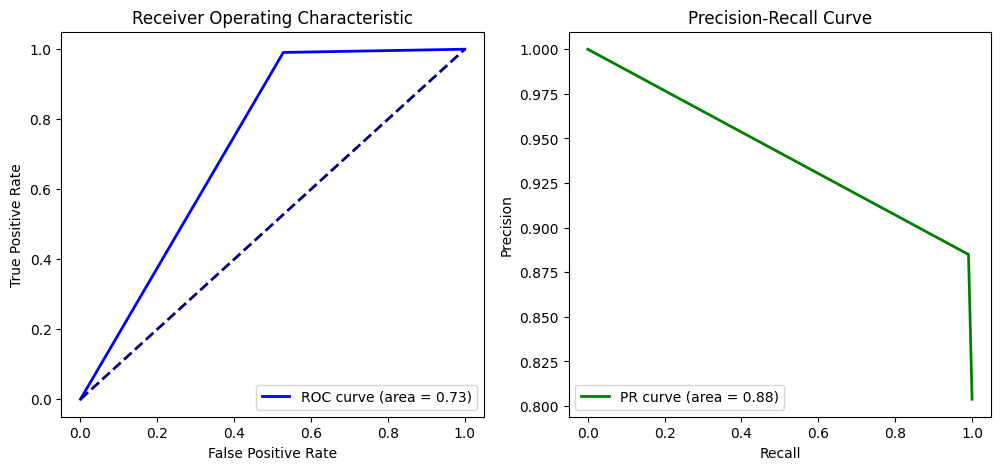

In [170]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# 计算PR曲线
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = average_precision_score(y_test, y_pred)

# 绘制ROC曲线
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# 绘制PR曲线
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.show()

In [146]:
# xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 89.60%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.95      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.66      0.94      0.90       0.80          0.88
support   48631.00 196977.00      0.90  245608.00     245608.00
_______________________________________________
Confusion Matrix: 
 [[ 24492  24139]
 [  1403 195574]]

Test Result:
Accuracy Score: 88.89%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.91      0.89      0.89       0.90          0.89
recall        0.48      0.99      0.89       0.73          0.89
f1-score      0.63      0.93      0.89       0.78          0.87
support   25583.00 104839.00      0.89  130422.00     130422.00
_________________________________________

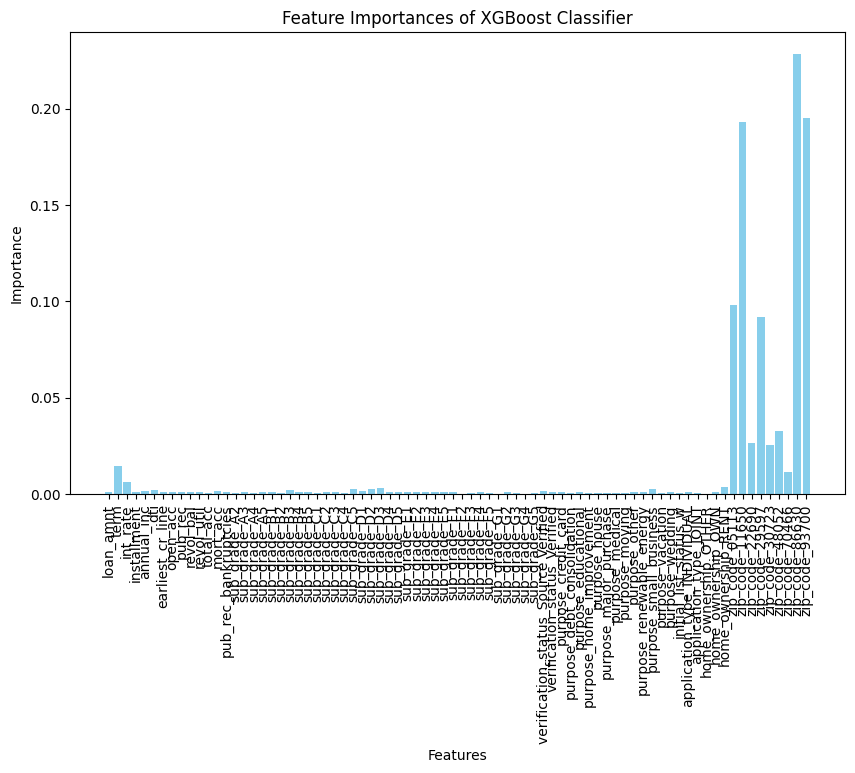

In [155]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_clf.feature_importances_)), xgb_clf.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances of XGBoost Classifier')
plt.xticks(range(len(xgb_clf.feature_importances_)), train.drop('loan_status',axis=1).columns,rotation = 90)
plt.show()

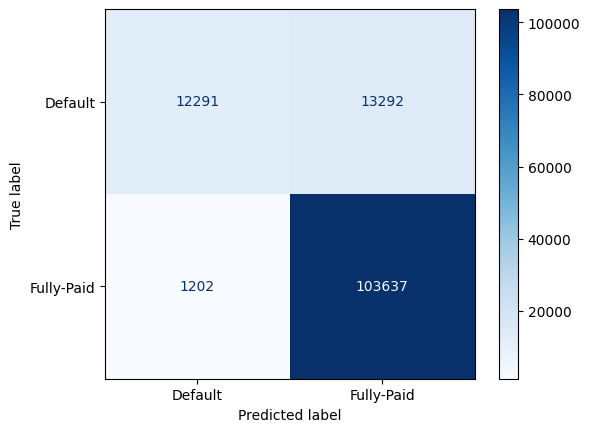

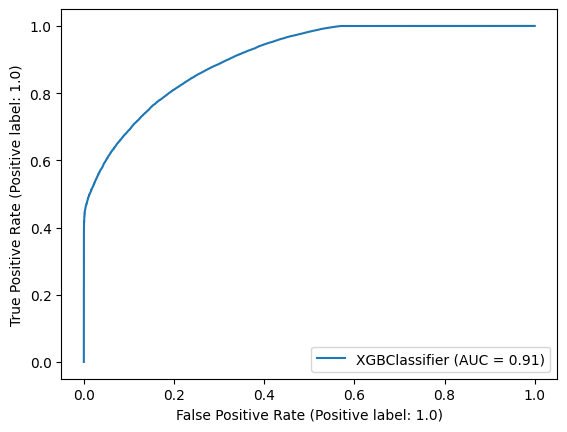

In [158]:
disp = ConfusionMatrixDisplay.from_estimator(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)

In [159]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   48631.00 196977.00      1.00  245608.00     245608.00
_______________________________________________
Confusion Matrix: 
 [[ 48629      2]
 [     0 196977]]

Test Result:
Accuracy Score: 88.88%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.96      0.88      0.89       0.92          0.90
recall        0.45      1.00      0.89       0.72          0.89
f1-score      0.61      0.94      0.89       0.77          0.87
support   25583.00 104839.00      0.89  130422.00     130422.00
________________________________________

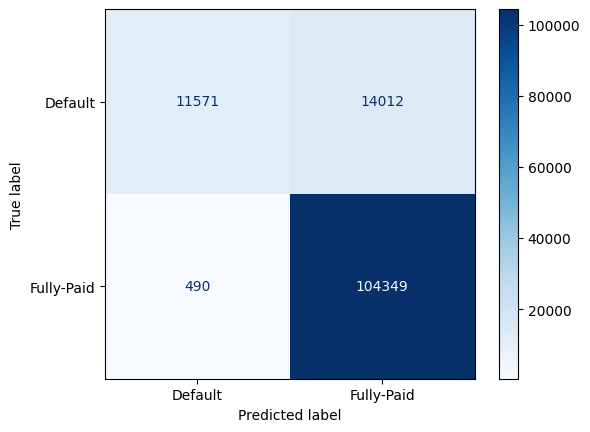

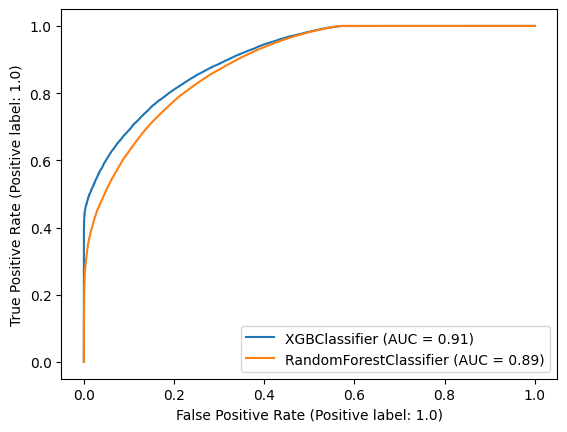

In [160]:
disp = ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_)

In [167]:
rej_data = data[data['loan_status'] == 0]
acc_data = data[data['loan_status'] == 1]
acc_data = acc_data.sample(frac = len(rej_data)/len(acc_data))

In [172]:
new_data = pd.concat([rej_data,acc_data]).sample(frac = 1)

In [173]:
new_data

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
134525,6000.00,36,10.99,196.41,59500.00,1,7.32,2005,11.00,2.00,2876.00,15.50,24.00,2.00,0.00,False,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
246656,14125.00,36,12.12,469.97,29000.00,1,17.38,2002,6.00,0.00,5026.00,24.20,16.00,0.00,0.00,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False
84262,12000.00,60,15.61,289.34,133000.00,0,35.06,2004,20.00,0.00,71719.00,85.20,42.00,2.00,0.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False
363153,7500.00,36,21.48,284.42,60000.00,0,13.18,1987,9.00,3.00,4117.00,40.80,17.00,2.00,0.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
293719,9000.00,36,7.89,281.58,40000.00,0,18.69,2010,18.00,0.00,7509.00,36.30,20.00,0.00,0.00,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234474,31050.00,60,18.55,797.79,62137.84,0,15.94,1972,4.00,0.00,622.00,77.70,18.00,7.00,0.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
41325,18825.00,60,24.70,549.24,108000.00,0,6.50,2000,7.00,0.00,3933.00,36.20,11.00,1.00,0.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
382147,12000.00,60,19.22,312.75,92000.00,0,9.08,1990,12.00,0.00,11827.00,82.70,29.00,0.00,0.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
347166,28000.00,60,23.28,793.85,96000.00,0,21.24,1993,6.00,0.00,47226.00,91.30,21.00,3.00,0.00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True


In [174]:
X = new_data.drop('loan_status',axis=1)
y = new_data['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [176]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "XGBoostClassifier": XGBClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
}

In [ ]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 80.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 76.0 % accuracy score


In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_